In [13]:
import numpy as np
from scipy import linalg as LA

4. [22 points] We will implement the LMS method for a linear regression task. The dataset
is from UCI repository (https://archive.ics.uci.edu/ml/datasets/Concrete+Slump+
Test). The task is to predict the real-valued SLUMP of the concrete, with 7 features.
The features and output are listed in the file “concrete/data-desc.txt”. The train-
ing data are stored in the file “concrete/train.csv”, consisting of 53 examples. The
test data are stored in “concrete/test.csv”, and comprise of 50 examples. In both the
training and testing datasets, feature values and outputs are separated by commas.


(a) [8 points] Implement the batch gradient descent algorithm, and tune the learning
rate r to ensure the algorithm converges. To examine convergence, you can watch
the norm of the weight vector difference, ‖wt − wt−1‖, at each step t. if ‖wt − wt−1‖
is less than a tolerance level, say, 10^−6, you can conclude that it converges. You
can initialize your weight vector to be 0. Please find an appropriate r such that
the algorithm converges. To tune r, you can start with a relatively big value,
say, r = 1, and then gradually decrease r, say r = 0.5,0.25,0.125,..., until you
see the convergence. Report the learned weight vector, and the learning rate r.
Meanwhile, please record the cost function value of the training data at each step,
and then draw a figure shows how the cost function changes along with steps. Use
your final weight vector to calculate the cost function value of the test data.


In [7]:
# def calculate_gradient(X, y, W):
#     """
#     Calculate the gradient of the loss with respect to the Weights.
#     """
#     gradient = np.zeros_like(W)
#     for j in range(len(W)):
#         for i in range(len(X)):
#             gradient[j] += (y[i] - np.dot(X[i], W)) * (X[i][j] * -1)
#     print(gradient)
#     return gradient

In [14]:
def calculate_gradient(X, y, W):
    """
    Calculate the gradient of the loss with respect to the Weights.
    """
    # print(" Beginnig W: " + str(W))
    gradient = np.zeros_like(W)
    W_transpose = np.transpose(W)
    for j in range(len(W)):
        for i in range(len(X)):
            gradient[j] += (y[i] - np.dot(W_transpose, X[i])) * (X[i][j] * -1)
            # print("gradient from " + str(j) + " " + str(i) + " " + str(gradient))    
    # print("gradient: " + str(gradient))
    # error = y - np.dot(X, W)
    # gradient = np.dot(X.T, error)

    return gradient

def cost_function(X, y, W):
    """
    Calculate the cost function of the linear regression.
    """
    cost = 0
    for i in range(len(X)):
        cost += (y[i] - np.dot(X[i], W)) ** 2
    return cost

Batch Gradient Descent
Final Weights:  [-0.01520362  0.90022499  0.78594341  0.85066508  1.29862298  0.12983393
  1.5717928   0.99834709]
Final Loss on Test Data:  46.722610538393205


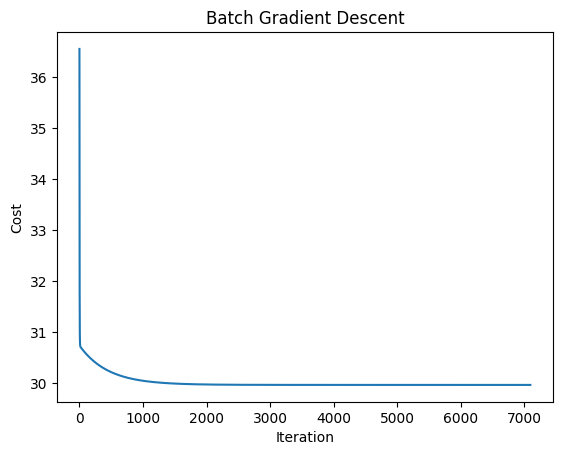

In [29]:
X_training = np.genfromtxt('../data/concrete/train.csv', delimiter=',')
y_training = X_training[:, -1]
X_training = np.insert(X_training, 0, 1, axis=1)
X_training = X_training[:, :-1]

W = np.zeros(X_training.shape[1])

converged = False
tolerance_level = 10 ** -6
r = .01
num_iterations = 0

cost = {}

while not converged:
    # print("\n" + "w before calculate_gradient" + str(W))
    gradient_J_W_t = calculate_gradient(X_training, y_training, W)
    W_t = W - (r * gradient_J_W_t)
    # print("w_t after calculate_gradient" + str(W_t) + "\n")
    converged = np.linalg.norm(W_t - W) < tolerance_level
    W = W_t
    cost[num_iterations] = cost_function(X_training, y_training, W)
    # r = r * .5
    num_iterations += 1



X_test = np.genfromtxt('../data/concrete/test.csv', delimiter=',')
y_test = X_test[:, -1]
X_test = np.insert(X_test, 0, 1, axis=1)
X_test = X_test[:, :-1]

final_loss = cost_function(X_test, y_test, W)

print("Batch Gradient Descent")
print("Final Weights: ", W)
print("Final Loss on Test Data: ", final_loss)
# print("Final Learning Rate: ", r)
# print("Number of Iterations: ", num_iterations)

#cost figure

import matplotlib.pyplot as plt
plt.plot(list(cost.keys()), list(cost.values()))
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Batch Gradient Descent")
plt.show()

Optimal Weight Vector:  [-0.01519667  0.90056451  0.78629331  0.85104314  1.29889413  0.12989067
  1.57224887  0.99869359]



(b) [8 points] Implement the stochastic gradient descent (SGD) algorithm. You can
initialize your weight vector to be 0. Each step, you randomly sample a training
example, and then calculate the stochastic gradient to update the weight vector.
Tune the learning rate r to ensure your SGD converges. To check convergence, you
can calculate the cost function of the training data after each stochastic gradient
update, and draw a figure showing how the cost function values vary along with
the number of updates. At the beginning, your curve will oscillate a lot. However,
with an appropriate r, as more and more updates are finished, you will see the
cost function tends to converge. Please report the learned weight vector, and the
learning rate you chose, and the cost function value of the test data with your
learned weight vector.

In [10]:
def calculate_gradient_stochastic(X, y, W):
    """
    Calculate the gradient of the loss with respect to the Weights.
    """
    gradient = np.zeros_like(W)
    random_x = np.random.randint(0, len(X))
    sample_x = X[random_x]
    sample_y = y[random_x]
    for j in range(len(W)):
        gradient[j] += (sample_y - np.dot(sample_x, W.T)) * (sample_x[j] * -1)

    return gradient

Stochastic Gradient Descent
Final Weights:  [-0.04892156  0.00727787 -0.09556492 -0.19326105  0.51391333 -0.05573808
  0.35381231  0.03247365]
Final Loss on Test Data:  49.19933060391609


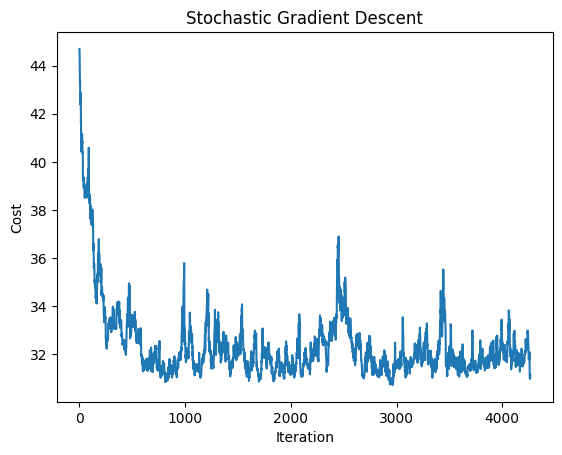

In [28]:
X_training = np.genfromtxt('../data/concrete/train.csv', delimiter=',')
y_training = X_training[:, -1]
X_training = np.insert(X_training, 0, 1, axis=1)
X_training = X_training[:, :-1]

X_test = np.genfromtxt('../data/concrete/test.csv', delimiter=',')
y_test = X_test[:, -1]
X_test = np.insert(X_test, 0, 1, axis=1)
X_test = X_test[:, :-1]

W = np.zeros(X_training.shape[1])

converged = False
tolerance_level = 10 ** -6
r = 0.01
num_iterations = 0
stochastic_cost = {}    

while not converged:
    gradient_J_W_t = calculate_gradient_stochastic(X_training, y_training, W)
    W_t = W - (r * gradient_J_W_t)
    converged = np.linalg.norm(W_t - W) < tolerance_level
    W = W_t
    stochastic_cost[num_iterations] = cost_function(X_training, y_training, W)
    # r = r * .5
    num_iterations += 1

X_test = np.genfromtxt('../data/concrete/test.csv', delimiter=',')
y_test = X_test[:, -1]
X_test = np.insert(X_test, 0, 1, axis=1)
X_test = X_test[:, :-1]

final_loss = cost_function(X_test, y_test, W)

print("Stochastic Gradient Descent")
print("Final Weights: ", W)
print("Final Loss on Test Data: ", final_loss)
# print("Final Learning Rate: ", r)
# print("Number of Iterations: ", num_iterations)

#cost figure

import matplotlib.pyplot as plt
plt.plot(list(stochastic_cost.keys()), list(stochastic_cost.values()))
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title('Stochastic Gradient Descent')
plt.show()

[-0.01519667  0.90056451  0.78629331  0.85104314  1.29889413  0.12989067
  1.57224887  0.99869359]

(c) [6 points] We have discussed how to calculate the optimal weight vector with an
analytical form. Please calculate the optimal weight vector in this way. Comparing with the weight vectors learned by batch gradient descent and stochastic
gradient descent, what can you conclude? Why?

In [31]:
X_training = np.genfromtxt('../data/concrete/train.csv', delimiter=',')
y_training = X_training[:, -1]
X_training = np.insert(X_training, 0, 1, axis=1)
X_training = X_training[:, :-1]

a = LA.inv(X_training.T @ X_training) @ X_training.T @ y_training
print("Optimal Weight Vector: ", a)

X_test = np.genfromtxt('../data/concrete/test.csv', delimiter=',')
y_test = X_test[:, -1]
X_test = np.insert(X_test, 0, 1, axis=1)
X_test = X_test[:, :-1]

final_lost = cost_function(X_test, y_test, a)
print("Final Loss on Test Data: ", final_lost)

# print("Loss on Test Set: ", LA.norm(y_test - np.dot(X_test, a)))
# print("Loss on Training Set: ", LA.norm(y_training - np.dot(X_training, a)))


Optimal Weight Vector:  [-0.01519667  0.90056451  0.78629331  0.85104314  1.29889413  0.12989067
  1.57224887  0.99869359]
Final Loss on Test Data:  46.72352895987772
